# Demographic Filtering System Kantin

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix

## Assembling Data Produk dan Data Rating

In [2]:
df_makanan = pd.read_csv('data/KX-Makanan.csv')
df_rating = pd.read_csv('data/KX-Ratings.csv')

In [3]:
df_rating.head(1)

,user_id,id_produk,rating_produk
0,145121,1,5


In [4]:
df_makanan.tail(15)

,id_produk,nama_produk,deskripsi_produk,jenis_produk,harga,tempat
43,44,Onion Rings,"bawang bombay, goreng",makanan cepat saji,10000,kantin jujur
44,45,Carbonara Pasta,"pasta, creamy, susu, keju",makanan cepat saji,15000,kantin jujur
45,46,Spaghetti Bolognase,"pasta, bolognase, sapi",makanan cepat saji,15000,kantin jujur
46,47,Cola,"cola cola, es, dingin",minuman,8000,kantin jujur
47,48,Lemon Tea,"lemon , teh, dingin",minuman,8000,kantin jujur
48,49,Vanilla Ice Cream,"es , krim, vanilla",minuman,8000,kantin jujur
49,50,Chocolate Ice Cream,"es , krim, coklat",minuman,8000,kantin jujur
50,51,Spaghetti Bolognase,"pasta, bolognase, sapi",makanan cepat saji,17000,kantin Delima
51,52,Spaghetti Aglio Olio,"pasta, udang, ayam",makanan cepat saji,17000,kantin Delima
52,53,Spaghetti Carbonara,"pasta, creamy, susu, keju",makanan cepat saji,17000,kantin Delima


In [5]:
df_makanan.shape

(58, 6)

In [6]:
df_rating

,user_id,id_produk,rating_produk
0,145121,1,5
1,145121,21,5
2,145121,45,2
3,145121,2,4
4,145121,41,3
5,145121,2,3
6,145121,20,4
7,146782,21,5
8,146782,2,4
9,146782,32,5


In [7]:
df_rating.shape

(16, 3)

In [8]:
food_rating = pd.merge(df_makanan, df_rating, on='id_produk')

In [9]:
food_rating

,id_produk,nama_produk,deskripsi_produk,jenis_produk,harga,tempat,user_id,rating_produk
0,1,Ayam Goreng,"ayam, goreng",Lauk,19000,kantin jaya,145121,5
1,2,Ayam Bakar,"ayam, bakar",Lauk,19000,kantin jaya,145121,4
2,2,Ayam Bakar,"ayam, bakar",Lauk,19000,kantin jaya,145121,3
3,2,Ayam Bakar,"ayam, bakar",Lauk,19000,kantin jaya,146782,4
4,20,Mie Goreng Special,"mie, goreng, kecap, sosis, telor, bakso",mie,25000,kantin jaya,145121,4
5,20,Mie Goreng Special,"mie, goreng, kecap, sosis, telor, bakso",mie,25000,kantin jaya,146782,4
6,21,Gulai Nangka,"sayur, santan , nangka",Sayuran,7000,kantin jaya,145121,5
7,21,Gulai Nangka,"sayur, santan , nangka",Sayuran,7000,kantin jaya,146782,5
8,32,Ayam Goreng Lengkuas,"ayam, goreng",lauk,15000,kantin cemara,146782,5
9,37,Kwatiau Cumi,"kwetiau, mie, cumi",mie,15000,kantin cemara,146782,5


In [10]:
food_rating.shape

(16, 8)

In [11]:
data = food_rating.groupby(['id_produk','nama_produk', 'deskripsi_produk', 'jenis_produk','harga','tempat'], as_index=False)['rating_produk'].mean()

In [12]:
data

,id_produk,nama_produk,deskripsi_produk,jenis_produk,harga,tempat,rating_produk
0,1,Ayam Goreng,"ayam, goreng",Lauk,19000,kantin jaya,5.000000
1,2,Ayam Bakar,"ayam, bakar",Lauk,19000,kantin jaya,3.666667
2,20,Mie Goreng Special,"mie, goreng, kecap, sosis, telor, bakso",mie,25000,kantin jaya,4.000000
3,21,Gulai Nangka,"sayur, santan , nangka",Sayuran,7000,kantin jaya,5.000000
4,32,Ayam Goreng Lengkuas,"ayam, goreng",lauk,15000,kantin cemara,5.000000
5,37,Kwatiau Cumi,"kwetiau, mie, cumi",mie,15000,kantin cemara,5.000000
6,41,Chicken Burger,"ayam , roti, sayur",makanan cepat saji,20000,kantin jujur,2.500000
7,43,Kentang Goreng,"kentang, goreng",makanan cepat saji,10000,kantin jujur,1.000000
8,45,Carbonara Pasta,"pasta, creamy, susu, keju",makanan cepat saji,15000,kantin jujur,2.000000
9,52,Spaghetti Aglio Olio,"pasta, udang, ayam",makanan cepat saji,17000,kantin Delima,5.000000


In [13]:
data1 = food_rating.groupby(['id_produk'], as_index=False)['rating_produk'].count()

In [14]:
data1

,id_produk,rating_produk
0,1,1
1,2,3
2,20,2
3,21,2
4,32,1
5,37,1
6,41,2
7,43,1
8,45,2
9,52,1


In [15]:
data.rename({'rating_produk':'vote_average'}, axis=1,inplace=True)
data1.rename({'rating_produk':'vote_count'}, axis=1,inplace=True)

In [16]:
data.head(1)

,id_produk,nama_produk,deskripsi_produk,jenis_produk,harga,tempat,vote_average
0,1,Ayam Goreng,"ayam, goreng",Lauk,19000,kantin jaya,5.0


In [17]:
data1.head(1)

,id_produk,vote_count
0,1,1


In [18]:
df = pd.merge(data,data1, on='id_produk')

In [19]:
df

,id_produk,nama_produk,deskripsi_produk,jenis_produk,harga,tempat,vote_average,vote_count
0,1,Ayam Goreng,"ayam, goreng",Lauk,19000,kantin jaya,5.000000,1
1,2,Ayam Bakar,"ayam, bakar",Lauk,19000,kantin jaya,3.666667,3
2,20,Mie Goreng Special,"mie, goreng, kecap, sosis, telor, bakso",mie,25000,kantin jaya,4.000000,2
3,21,Gulai Nangka,"sayur, santan , nangka",Sayuran,7000,kantin jaya,5.000000,2
4,32,Ayam Goreng Lengkuas,"ayam, goreng",lauk,15000,kantin cemara,5.000000,1
5,37,Kwatiau Cumi,"kwetiau, mie, cumi",mie,15000,kantin cemara,5.000000,1
6,41,Chicken Burger,"ayam , roti, sayur",makanan cepat saji,20000,kantin jujur,2.500000,2
7,43,Kentang Goreng,"kentang, goreng",makanan cepat saji,10000,kantin jujur,1.000000,1
8,45,Carbonara Pasta,"pasta, creamy, susu, keju",makanan cepat saji,15000,kantin jujur,2.000000,2
9,52,Spaghetti Aglio Olio,"pasta, udang, ayam",makanan cepat saji,17000,kantin Delima,5.000000,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_produk         10 non-null     int64  
 1   nama_produk       10 non-null     object 
 2   deskripsi_produk  10 non-null     object 
 3   jenis_produk      10 non-null     object 
 4   harga             10 non-null     int64  
 5   tempat            10 non-null     object 
 6   vote_average      10 non-null     float64
 7   vote_count        10 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 720.0+ bytes


## Cleaning data 

### Describing Data 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_produk         10 non-null     int64  
 1   nama_produk       10 non-null     object 
 2   deskripsi_produk  10 non-null     object 
 3   jenis_produk      10 non-null     object 
 4   harga             10 non-null     int64  
 5   tempat            10 non-null     object 
 6   vote_average      10 non-null     float64
 7   vote_count        10 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 720.0+ bytes


In [22]:
df_describe =[]

for i in df.columns:
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

DESC = pd.DataFrame(df_describe, columns=['column','type','nan','nan(%)','nunique','unique']) #memberi nama kolom 
DESC

,column,type,nan,nan(%),nunique,unique
0,id_produk,int64,0,0.0,10,"[1, 2, 20, 21, 32, 37, 41, 43, 45, 52]"
1,nama_produk,object,0,0.0,10,"[Ayam Goreng, Ayam Bakar, Mie Goreng Special, ..."
2,deskripsi_produk,object,0,0.0,9,"[ayam, goreng, ayam, bakar, mie, goreng, kecap..."
3,jenis_produk,object,0,0.0,5,"[Lauk, mie, Sayuran, lauk, makanan cepat saji]"
4,harga,int64,0,0.0,7,"[19000, 25000, 7000, 15000, 20000, 10000, 17000]"
5,tempat,object,0,0.0,4,"[kantin jaya, kantin cemara, kantin jujur, kan..."
6,vote_average,float64,0,0.0,6,"[5.0, 3.6666666666666665, 4.0, 2.5, 1.0, 2.0]"
7,vote_count,int64,0,0.0,3,"[1, 3, 2]"


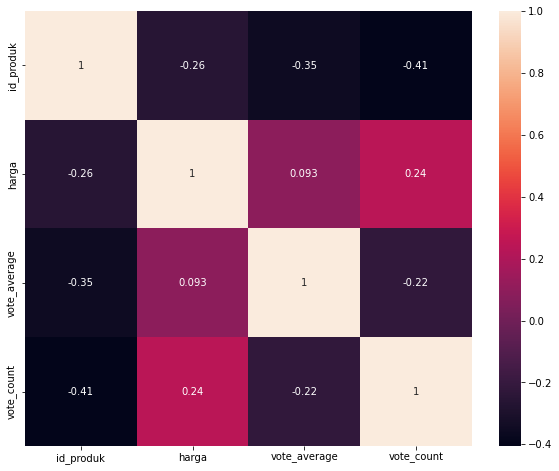

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Handling Missing Values

In [24]:
df.dropna(thresh=4, inplace=True)
df.fillna(method='ffill', inplace=True)
df.drop_duplicates(inplace=True)

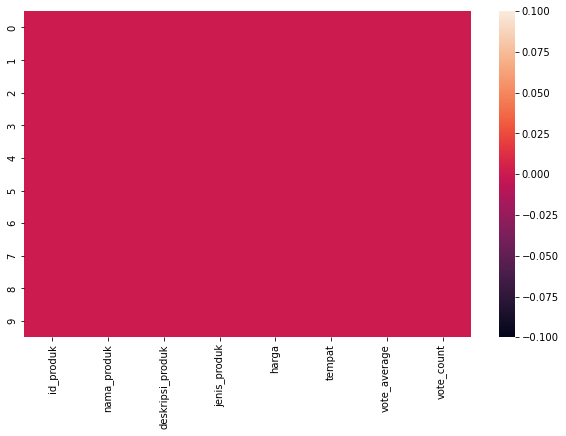

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

### EDA (Exploratory Data Analysis) 

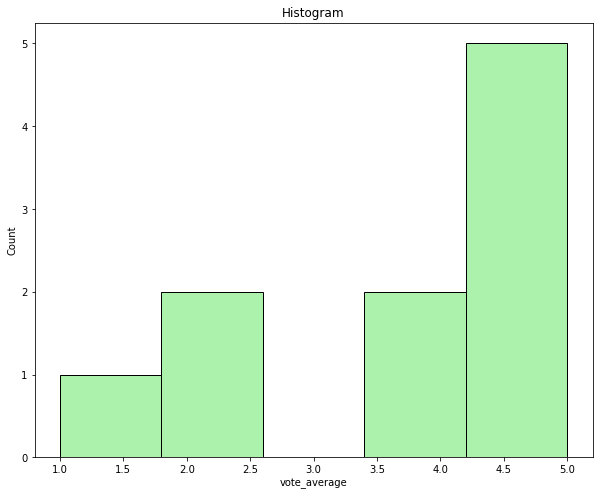

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(x=df['vote_average'], data=df, color="lightgreen")
plt.title("Histogram") 
plt.show()

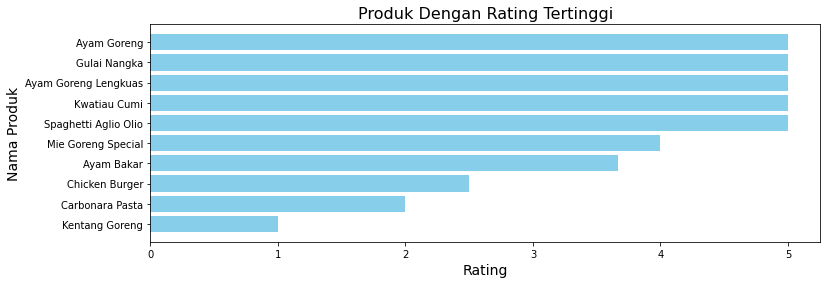

In [27]:
top= df.sort_values('vote_average', ascending=False).head(10)
plt.figure(figsize=(12,4))
plt.barh(top['nama_produk'],top['vote_average'], align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Nama Produk", fontsize=14)
plt.title("Produk Dengan Rating Tertinggi", fontsize="16")
plt.show()

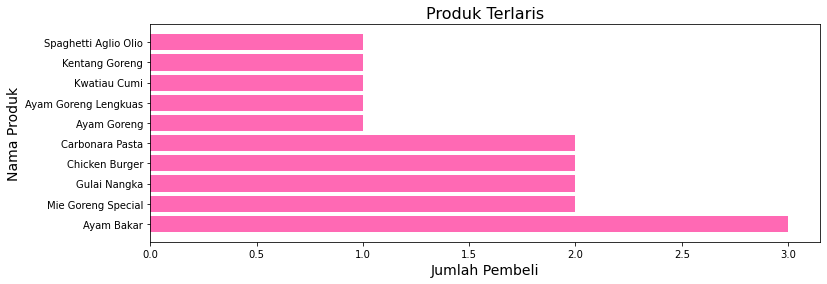

In [28]:
top= df.sort_values('vote_count', ascending=False).head(10)
plt.figure(figsize=(12,4))
plt.barh(top['nama_produk'],top['vote_count'], align='center', color='hotpink')
plt.title("Produk Terlaris",  fontsize=16)
plt.xlabel("Jumlah Pembeli",  fontsize=14)
plt.ylabel("Nama Produk", fontsize=14)
plt.show()

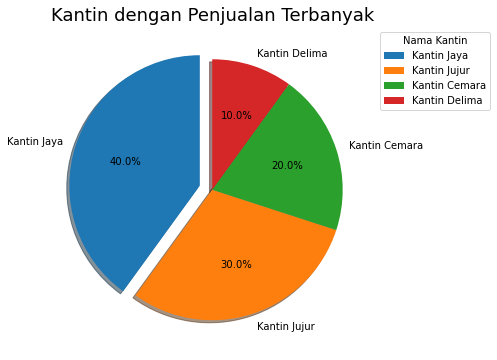

In [29]:
plt.figure(figsize=(10,6))
mylabels = ["Kantin Jaya", "Kantin Jujur", "Kantin Cemara", "Kantin Delima"]
myexplode = [0.1, 0, 0, 0]


plt.pie(df['tempat'].value_counts(),labels = mylabels , explode = myexplode, startangle = 90, autopct='%1.1f%%', shadow=True)
plt.title('Kantin dengan Penjualan Terbanyak', fontsize=18)

plt.legend(title="Nama Kantin",loc="upper left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


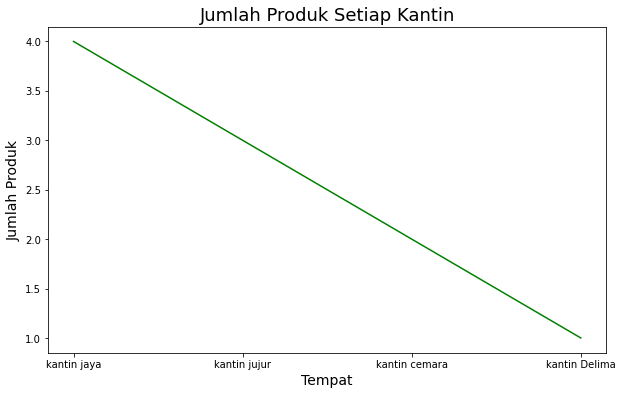

In [30]:
plt.figure(figsize=(10,6))
plt.plot(df['tempat'].value_counts(), color='g')
plt.title('Jumlah Produk Setiap Kantin', fontsize=18)
plt.xlabel('Tempat', fontsize=14)
plt.ylabel('Jumlah Produk', fontsize=14)
plt.show()

## Modelling

In [31]:

class RecommenderSytem:
    def __init__(self, data):
        self.df = data
    
    def recommend(self, kategori=None, tempat=None, topk=3):
        df = self.df.copy()
        df = self.demograhic_filter(df, kategori=kategori, tempat=tempat)
        df = self.compute_food_score(df)
        
        
        result = df.iloc[:, 0:8]
        result = result.sort_values(by ='vote_average' , ascending=False)
        result = result.head(topk)
        return result
    
    @staticmethod
    def demograhic_filter(df, kategori=None, tempat=None):
        df = df.copy()
        if kategori is not None:
            df = df[df.jenis_produk==kategori] 
        if tempat is not None:
            df = df[df.tempat==tempat]  
       
        return df
    
    
    @staticmethod
    def compute_food_score(df, q=0.2):
        df = df.copy()
    
        m = df.vote_count.quantile(q)
        C = (df.vote_average * df.vote_count).sum() / df.vote_count.sum()

        df = df[df.vote_count >= m]
        df["score"] = df.apply(lambda x: (x.vote_average * x.vote_count + C*m) / (x.vote_count + m), axis=1, result_type='reduce')
                    
        return df
    

In [32]:
recsys = RecommenderSytem(data=df)

In [33]:
recsys.recommend(tempat='kantin jaya')

,id_produk,nama_produk,deskripsi_produk,jenis_produk,harga,tempat,vote_average,vote_count
3,21,Gulai Nangka,"sayur, santan , nangka",Sayuran,7000,kantin jaya,5.000000,2
2,20,Mie Goreng Special,"mie, goreng, kecap, sosis, telor, bakso",mie,25000,kantin jaya,4.000000,2
1,2,Ayam Bakar,"ayam, bakar",Lauk,19000,kantin jaya,3.666667,3


In [34]:
recsys.recommend(tempat="kantin Delima")

,id_produk,nama_produk,deskripsi_produk,jenis_produk,harga,tempat,vote_average,vote_count
9,52,Spaghetti Aglio Olio,"pasta, udang, ayam",makanan cepat saji,17000,kantin Delima,5.0,1
